In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import scipy as sc
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
import warnings
import sys
import matplotlib.pyplot as plt
%matplotlib inline

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
train = pd.read_csv('cell2celltrain.csv')
train = train.dropna().drop_duplicates()
X_train = train.drop(["CustomerID", "Churn"], axis = 1)
y_train = train['Churn']
X_test = pd.read_csv('cell2cellholdout.csv')
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(49752, 56)
(49752,)
(20000, 58)


In [2]:
# select data where it is categorial
train_data_num = X_train.select_dtypes(include=['float64', 'int64'])
train_data_cat = X_train.select_dtypes(include=['object'])
print(train_data_num.shape)
print(train_data_cat.shape)

(49752, 34)
(49752, 22)


In [3]:
train_data_cat = pd.get_dummies(train_data_cat)
train_data_cat.head()

,ServiceArea_AIRAIK803,ServiceArea_AIRAND864,ServiceArea_AIRASH828,ServiceArea_AIRAUG706,ServiceArea_AIRBEA843,ServiceArea_AIRCAM803,ServiceArea_AIRCHA843,ServiceArea_AIRCOL803,ServiceArea_AIRELI252,ServiceArea_AIRFLO843,...,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [4]:
# concating it again to dataFrame
X_train = pd.concat([train_data_num, train_data_cat], axis = 1)
X_train.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,0,0,0,1,0,0,0,1,0,0
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,0,0,0,1,0,0,0,0,0,1
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,0,0,1,0,0,0,0,1,0,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [5]:
# using StandartScaller to transform values
# but before need to split data on test and train set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled[:10])

[[-0.78339084 -0.57903247 -1.04527532 ...  1.71741427 -0.77433098
  -0.76958938]
 [-0.94157013 -0.97448769 -1.25571965 ... -0.58227069 -0.77433098
   1.29939423]
 [-0.46748354 -0.97827195 -0.37185349 ... -0.58227069 -0.77433098
   1.29939423]
 ...
 [ 0.07700525 -0.80798023  0.80663471 ...  1.71741427 -0.77433098
  -0.76958938]
 [-0.52840852 -0.94799787 -0.49812009 ... -0.58227069 -0.77433098
   1.29939423]
 [ 0.50280316  1.00468054  1.18543449 ...  1.71741427 -0.77433098
  -0.76958938]]


In [6]:
from sklearn.decomposition import PCA
# оставляем первые две главные компоненты
pca = PCA(n_components=2)
# подгоняем модель PCA на наборе данных breast cancer
pca.fit(X_train_scaled)
# преобразуем данные к первым двум главным компонентам
X_pca = pca.transform(X_train_scaled)
print("Форма исходного массива: {}".format(str(X_train_scaled.shape)))
print("Форма массива после сокращения размерности: {}".format(str(X_pca.shape)))

Форма исходного массива: (49752, 847)
Форма массива после сокращения размерности: (49752, 2)


Text(0, 0.5, 'Вторая главная компонента')

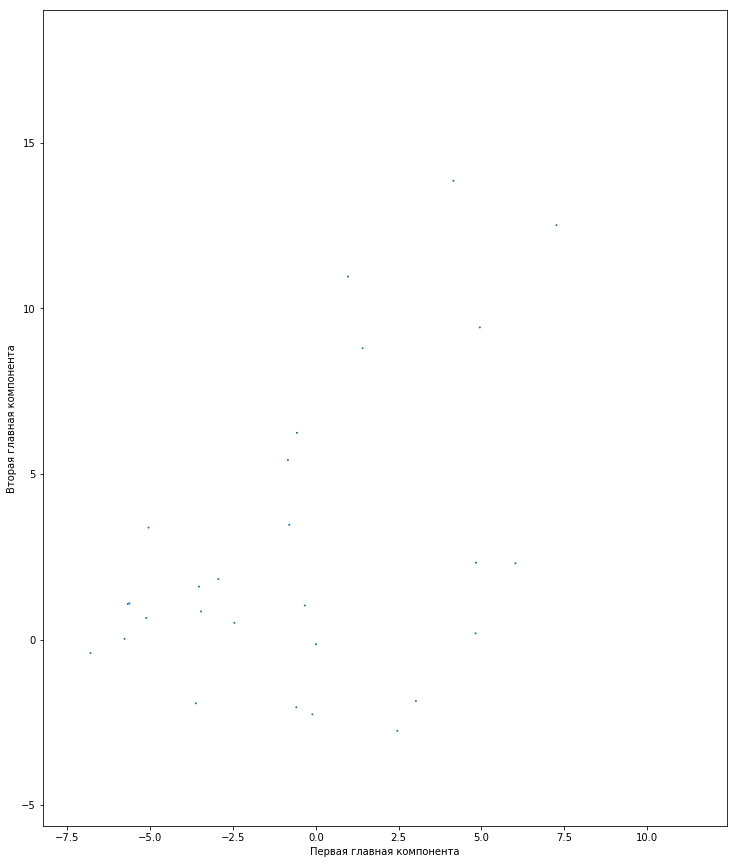

In [7]:
from sklearn.preprocessing import LabelBinarizer
binarizer = LabelBinarizer()
y_train = binarizer.fit_transform(y_train)

plt.figure(figsize=(15, 15))
plt.scatter(X_pca[:100, 0], X_pca[:100, 1], y_train)
plt.gca().set_aspect("equal")
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")

In [9]:
model = KMeans()
X_pca = np.array(X_pca.astype(float))
model.fit(X_pca)
correct = 0
for i in range(len(X_pca)):
    predict_me = np.array(X_pca[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = model.predict(predict_me)
    if prediction[0] == y_train[i]:
        correct += 1

print(correct/len(X_pca))

0.16716915902878277
